In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
Data911 = pd.read_csv("911.csv")
Data911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
Data911.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
CleanData911 = Data911.dropna()
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


###### Average Area of the 911 Calls

In [7]:
CleanData911['lat'].mean()

40.16051327436472

In [8]:
CleanData911['lng'].mean()

-75.31631130115736

In [9]:
CleanData911.describe()

,lat,lng,zip,e
count,86576.000000,86576.000000,86576.000000,86576.0
mean,40.160513,-75.316311,19237.659952,1.0
std,0.096151,0.179107,345.275446,0.0
min,30.333596,-95.595595,18036.000000,1.0
25%,40.102501,-75.398209,19038.000000,1.0
50%,40.145272,-75.301972,19401.000000,1.0
75%,40.232093,-75.206303,19446.000000,1.0
max,40.479853,-74.995041,77316.000000,1.0


In [10]:
CleanData911.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        86576 non-null  float64
 1   lng        86576 non-null  float64
 2   desc       86576 non-null  object 
 3   zip        86576 non-null  float64
 4   title      86576 non-null  object 
 5   timeStamp  86576 non-null  object 
 6   twp        86576 non-null  object 
 7   addr       86576 non-null  object 
 8   e          86576 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.6+ MB


In [11]:
Grouped911Calls = CleanData911.groupby("zip")["e"].count().reset_index(name="count")
Grouped911Calls = Grouped911Calls.sort_values(by="count",ascending = False)
Grouped911Calls.head(5)

,zip,count
67,19401.0,6977
85,19464.0,6641
68,19403.0,4854
79,19446.0,4745
70,19406.0,3173


In [12]:
GroupedTownCalls = CleanData911.groupby("twp")["e"].count().reset_index(name="count")
GroupedTownCalls = GroupedTownCalls.sort_values(by="count",ascending = False)
GroupedTownCalls.head(5)

,twp,count
25,LOWER MERION,7202
0,ABINGTON,5675
34,NORRISTOWN,5610
40,POTTSTOWN,4029
6,CHELTENHAM,3942


##### Unique number of 911 call titles

In [14]:
len(CleanData911["title"].unique())

107

#### Manipulate the dataframe

In [16]:
String = "afsafas:asdasdsa"
String.split(':')[0]

'afsafas'

In [17]:
CleanData911['EMT Reason'] = CleanData911['title'].str.split(':').str[0]
CleanData911

/tmp/ipykernel_755/3026665824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['EMT Reason'] = CleanData911['title'].str.split(':').str[0]


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [18]:
CleanData911['EMT Reason2'] = CleanData911.apply(lambda row : row['title'].split(':')[0],axis = 1)

/tmp/ipykernel_755/4036113558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['EMT Reason2'] = CleanData911.apply(lambda row : row['title'].split(':')[0],axis = 1)


In [19]:
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,EMT Reason2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,EMS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,EMS


In [20]:
CleanData911.drop("EMT Reason2",axis = 1)
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,EMT Reason2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,EMS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,EMS


In [21]:
del CleanData911['EMT Reason2']

In [22]:
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [23]:
CleanData911.groupby("EMT Reason")["e"].count()#reset_index(name="count")

EMT Reason
EMS        44318
Fire       13004
Traffic    29254
Name: e, dtype: int64

In [24]:
import seaborn as sns

<Axes: xlabel='EMT Reason', ylabel='count'>

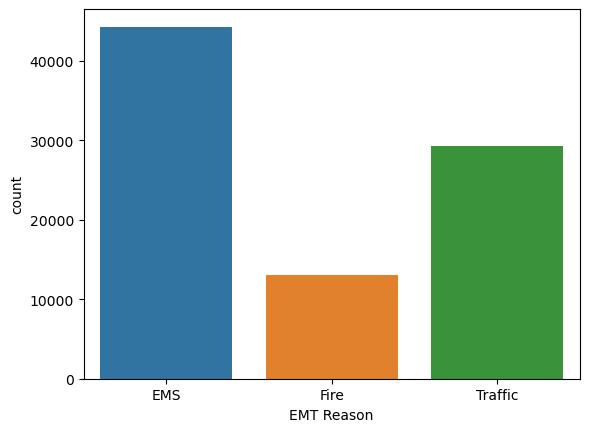

In [25]:
sns.countplot(x='EMT Reason',data=CleanData911)

In [26]:
CleanData911['timeStamp'].info()

<class 'pandas.core.series.Series'>
Int64Index: 86576 entries, 0 to 99491
Series name: timeStamp
Non-Null Count  Dtype 
--------------  ----- 
86576 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [27]:
type(CleanData911['timeStamp'][1])

str

In [28]:
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [29]:
from datetime import datetime

In [39]:
CleanData911['timeStamp'] = pd.to_datetime(CleanData911['timeStamp'], format = '%Y-%m-%d %H:%M:%S')
CleanData911

/tmp/ipykernel_755/2073493403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['timeStamp'] = pd.to_datetime(CleanData911['timeStamp'], format = '%Y-%m-%d %H:%M:%S')


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [41]:
time = CleanData911['timeStamp'].iloc[0]
time.weekday()

3

In [43]:
CleanData911['Hour'] = CleanData911.apply(lambda row : row['timeStamp'].hour,axis = 1)
CleanData911

/tmp/ipykernel_755/96321966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Hour'] = CleanData911.apply(lambda row : row['timeStamp'].hour,axis = 1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11


In [45]:
CleanData911['Month'] = CleanData911.apply(lambda row : row['timeStamp'].month,axis = 1)
CleanData911

/tmp/ipykernel_755/1343678357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Month'] = CleanData911.apply(lambda row : row['timeStamp'].month,axis = 1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8


In [47]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [49]:
CleanData911['Day of Week'] = CleanData911.apply(lambda row : row['timeStamp'].weekday(),axis = 1)
CleanData911

/tmp/ipykernel_755/2804089114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Day of Week'] = CleanData911.apply(lambda row : row['timeStamp'].weekday(),axis = 1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


In [51]:
CleanData911['Day of Week'] = CleanData911['Day of Week'].map(dmap)
CleanData911

/tmp/ipykernel_755/3823502575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Day of Week'] = CleanData911['Day of Week'].map(dmap)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


<Axes: xlabel='Day of Week', ylabel='count'>

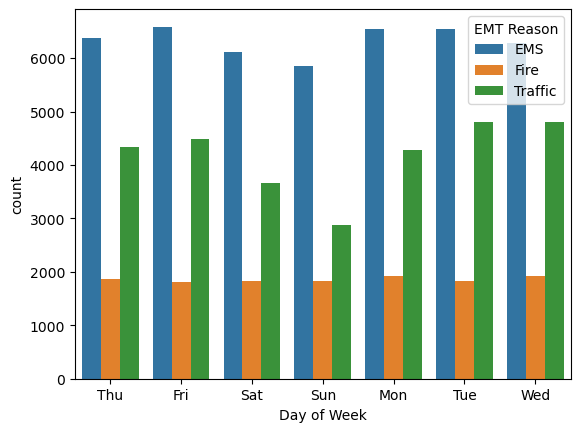

In [57]:
sns.countplot(x='Day of Week',hue = 'EMT Reason',data=CleanData911)

<Axes: xlabel='Month', ylabel='count'>

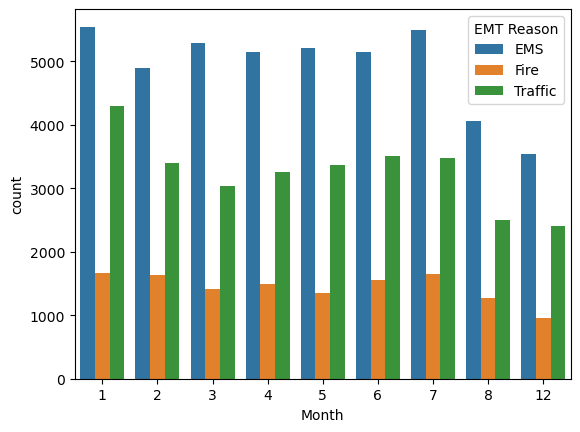

In [60]:
sns.countplot(x='Month',hue = 'EMT Reason',data=CleanData911)

##### Another Manipulation

In [69]:
import matplotlib.pylot as plt

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [65]:
GroupByMonth = CleanData911.groupby("Month")["e"].count()
GroupByMonth

Month
1     11511
2      9926
3      9753
4      9893
5      9939
6     10203
7     10624
8      7829
12     6898
Name: e, dtype: int64

In [79]:
GroupByMonthDF = GroupByMonth.to_frame()
GroupByMonthDF

,e
Month,
1,11511
2,9926
3,9753
4,9893
5,9939
6,10203
7,10624
8,7829
12,6898


In [86]:
Tester = pd.DataFrame({'Count': GroupByMonth})
Tester

,Count
Month,
1,11511
2,9926
3,9753
4,9893
5,9939
6,10203
7,10624
8,7829
12,6898


In [90]:
type(Tester)

pandas.core.frame.DataFrame

In [92]:
Tester.columns

Index(['Count'], dtype='object')

In [94]:
GroupedByMonth = CleanData911.groupby("Month")["e"].count().reset_index(name="count")
GroupedByMonth = GroupedByMonth.sort_values(by="count",ascending = False)
GroupedByMonth.head(5)

,Month,count
0,1,11511
6,7,10624
5,6,10203
4,5,9939
1,2,9926


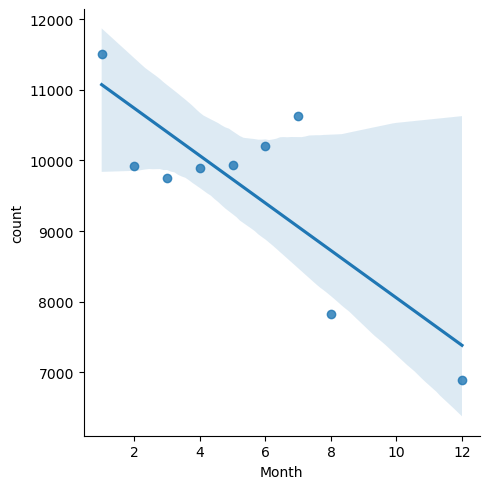

In [98]:
sns.lmplot(x="Month",y="count",data = GroupedByMonth)

In [102]:
byMonth = CleanData911.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939
6,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203
7,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624
8,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829
12,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898


In [117]:
Test = byMonth.reset_index()
Test

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Day of Week
0,1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
1,2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
2,3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
3,4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
4,5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939
5,6,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203,10203
6,7,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624,10624
7,8,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829
8,12,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898,6898


In [114]:
byMonth.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'EMT Reason', 'Hour', 'Day of Week'],
      dtype='object')

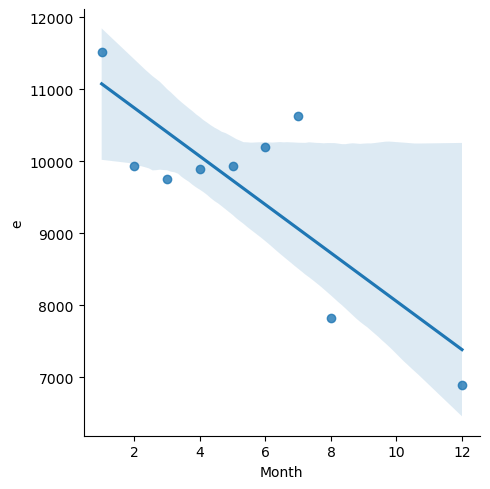

In [119]:
sns.lmplot(x="Month",y="e",data = Test)

In [122]:
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


In [127]:
CleanData911['Date'] = CleanData911.apply(lambda row : row['timeStamp'].date(),axis = 1)
CleanData911

/tmp/ipykernel_755/1250701910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Date'] = CleanData911.apply(lambda row : row['timeStamp'].date(),axis = 1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [130]:
byDate = CleanData911.groupby('Date').count()
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,99,99,99,99,99,99,99,99,99,99,99,99,99
2015-12-11,332,332,332,332,332,332,332,332,332,332,332,332,332
2015-12-12,333,333,333,333,333,333,333,333,333,333,333,333,333
2015-12-13,280,280,280,280,280,280,280,280,280,280,280,280,280
2015-12-14,386,386,386,386,386,386,386,386,386,386,386,386,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,279,279,279,279,279,279,279,279,279,279,279,279,279
2016-08-21,299,299,299,299,299,299,299,299,299,299,299,299,299
2016-08-22,336,336,336,336,336,336,336,336,336,336,336,336,336


In [132]:
TestDate = byDate.reset_index()
TestDate

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week
0,2015-12-10,99,99,99,99,99,99,99,99,99,99,99,99,99
1,2015-12-11,332,332,332,332,332,332,332,332,332,332,332,332,332
2,2015-12-12,333,333,333,333,333,333,333,333,333,333,333,333,333
3,2015-12-13,280,280,280,280,280,280,280,280,280,280,280,280,280
4,2015-12-14,386,386,386,386,386,386,386,386,386,386,386,386,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,279,279,279,279,279,279,279,279,279,279,279,279,279
255,2016-08-21,299,299,299,299,299,299,299,299,299,299,299,299,299
256,2016-08-22,336,336,336,336,336,336,336,336,336,336,336,336,336
257,2016-08-23,390,390,390,390,390,390,390,390,390,390,390,390,390


In [140]:
import matplotlib

In [144]:
import matplotlib.pyplot as plt

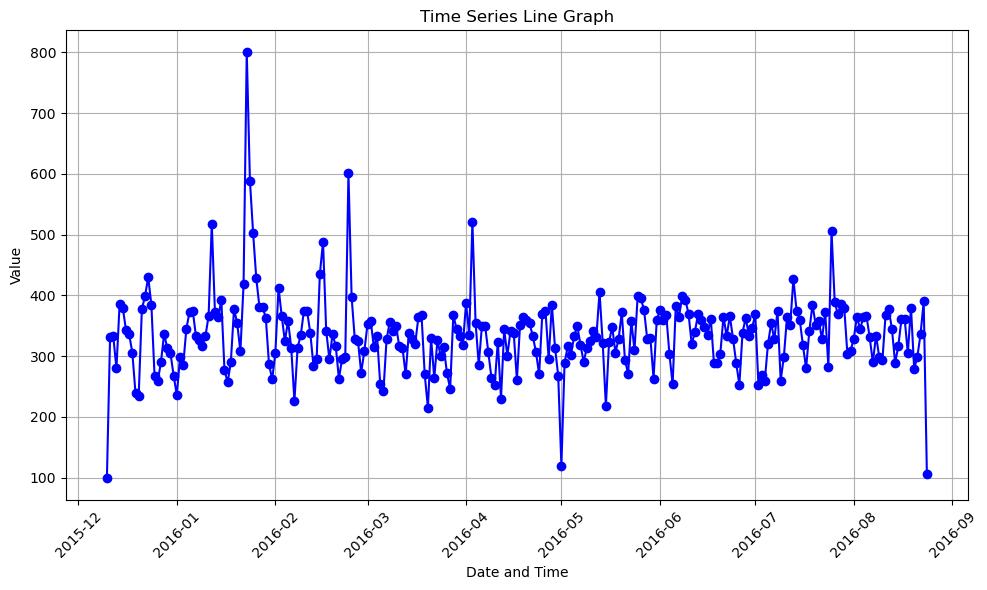

In [148]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Plot the line graph
plt.plot(TestDate['Date'], TestDate['e'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Time Series Line Graph')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()  # Adjust layout for better appearance (optional)
plt.show()


#### 3 Plots

In [154]:
EMS = CleanData911[CleanData911['EMT Reason'] == 'EMS']
Fire = CleanData911[CleanData911['EMT Reason'] == 'Fire']
Traffic = CleanData911[CleanData911['EMT Reason'] == 'Traffic']

In [156]:
byDateEMS = EMS.groupby('Date').count()
byDateFire = Fire.groupby('Date').count()
byDateTraffic = Traffic.groupby('Date').count()

In [158]:
TestDateEMS = byDateEMS.reset_index()
TestDateFire = byDateFire.reset_index()
TestDateTraffic = byDateTraffic.reset_index()

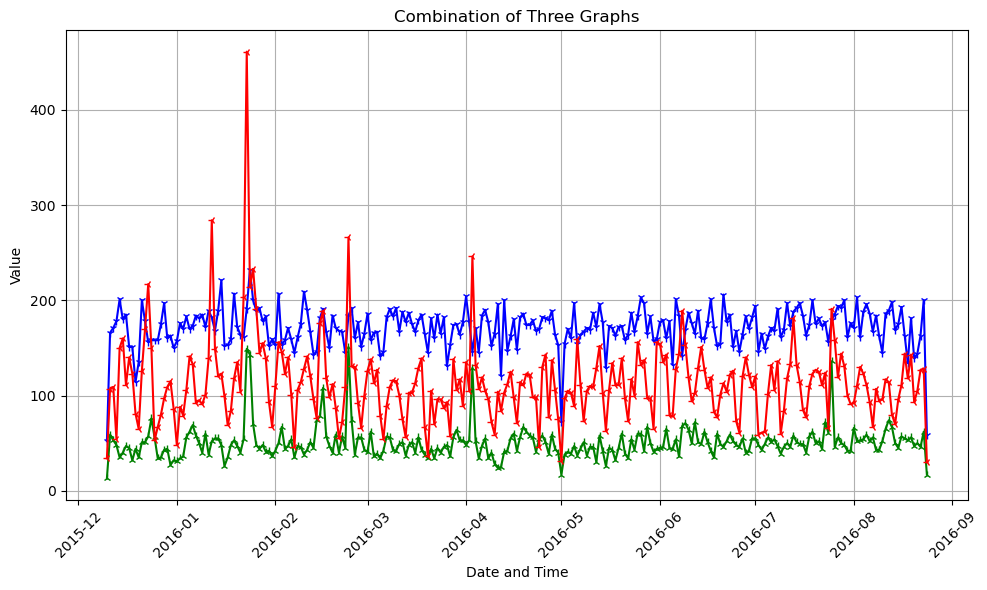

In [160]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Plot the line graph
plt.plot(TestDateEMS['Date'], TestDateEMS['e'], marker='1', linestyle='-', color='b')

plt.plot(TestDateFire['Date'], TestDateFire['e'], marker='2', linestyle='-', color='g')

plt.plot(TestDateTraffic['Date'], TestDateTraffic['e'], marker='3', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Combination of Three Graphs')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()  # Adjust layout for better appearance (optional)
plt.show()

In [164]:
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [171]:
byDayofWeek = CleanData911.groupby('Day of Week').count()
byDayofWeek

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Date
Day of Week,,,,,,,,,,,,,
Fri,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880
Mon,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757
Sat,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599
Sun,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550
Thu,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575
Tue,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197
Wed,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018


In [177]:
column_to_move = 'Hour'
new_position = 0
columns = CleanData911.columns.tolist()
columns.remove(column_to_move)
columns.insert(new_position, column_to_move)
CleanData_Reordered = CleanData911[columns]
CleanData_Reordered

,Hour,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Month,Day of Week,Date
0,17,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,2015-12-10
1,17,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,2015-12-10
2,17,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,2015-12-10
3,17,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,2015-12-10
5,17,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,11,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,8,Wed,2016-08-24
99488,11,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,8,Wed,2016-08-24
99489,11,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,8,Wed,2016-08-24
99490,11,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,8,Wed,2016-08-24


In [179]:
byDayofWeek = CleanData_Reordered.groupby('Day of Week').count()
byDayofWeek

,Hour,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Month,Date
Day of Week,,,,,,,,,,,,,
Fri,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880
Mon,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757
Sat,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599
Sun,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550
Thu,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575
Tue,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197
Wed,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018


In [198]:
Hours = CleanData_Reordered['Hour']
Hours

0        17
1        17
2        17
3        17
5        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 86576, dtype: int64

In [200]:
type(Hours)

pandas.core.series.Series

In [205]:
dayHour = CleanData911.groupby(by=['Day of Week','Hour']).count()['EMT Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307


<Axes: xlabel='Hour', ylabel='Hour'>

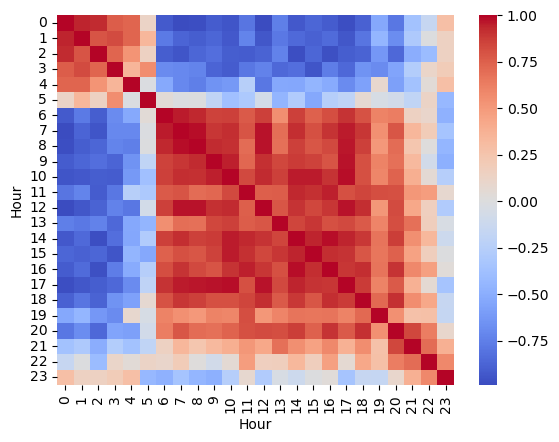

In [208]:
sns.heatmap(dayHour.corr(),cmap = 'coolwarm')

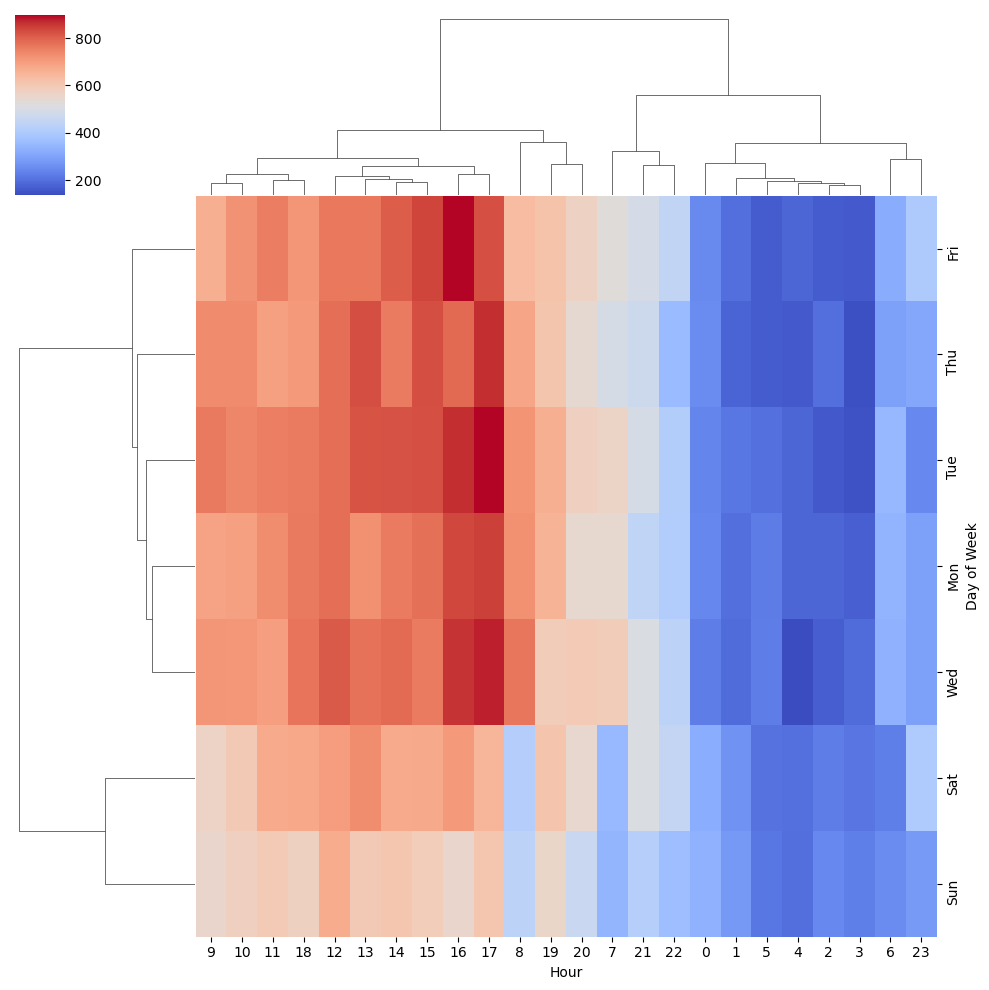

In [211]:
sns.clustermap(dayHour,cmap='coolwarm')

In [214]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307
Tue,241,214,161,148,184,203,350,563,719,763,...,821,823,867,896,759,665,578,494,411,245
Wed,225,193,169,193,138,224,332,591,769,714,...,787,760,860,878,771,590,596,507,432,294


In [217]:
dayMonth = CleanData911.groupby(by=['Day of Week','Month']).count()['EMT Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thu,1387,1391,1648,1390,1387,1800,1447,1038,1087


<Axes: xlabel='Month', ylabel='Month'>

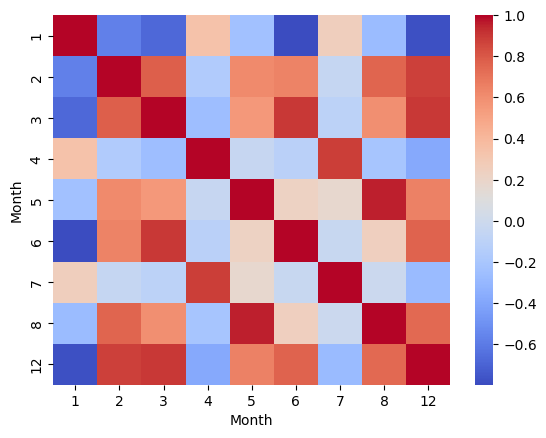

In [219]:
sns.heatmap(dayMonth.corr(),cmap = 'coolwarm')

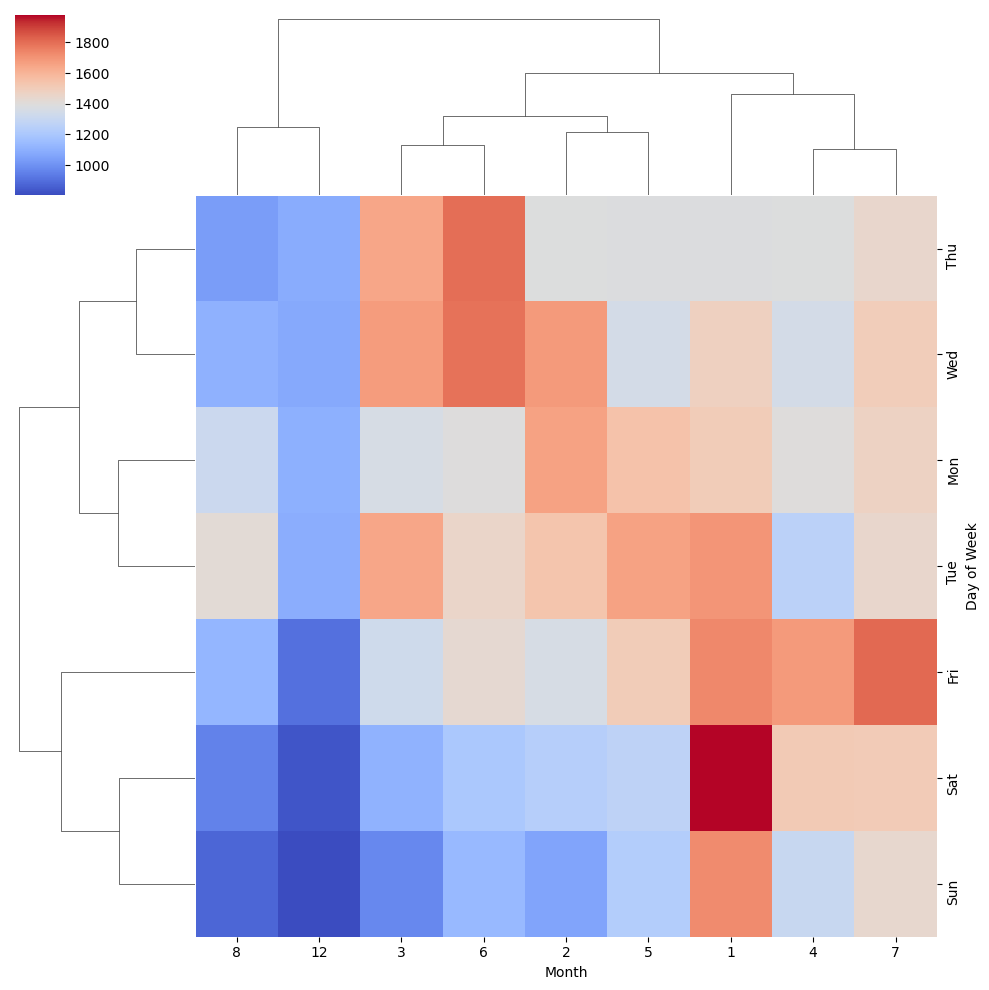

In [221]:
sns.clustermap(dayMonth,cmap='coolwarm')

#### Stopped here on 9/14/2023